Credits: https://habr.com/ru/post/556042/

##  Обследование данных

Каждая библиотека может быть отдельно включена в собственный исходный код. В целях получения доступа к математико-статистической функциональности, функциям для построения графиков и обработки файлов, в проект программы следует включить следующие строки:

In [26]:
import scipy as sp
from scipy import stats  # модуль статистических функций
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В качестве источника данных используется файл Excel, поэтому для чтения данных мы воспользуемся функцией read_excel

In [3]:
df = pd.read_excel('data/ch01/UK2010.xls')
df.tail()

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
646,647.0,Ynys Mon,Wales,2010.0,50075.0,34444,NaN,NaN,NaN,NaN,...,1201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,648.0,York Central,Yorkshire and the Humber,2010.0,76439.0,46483,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,649.0,York Outer,Yorkshire and the Humber,2010.0,75939.0,53300,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,650.0,Yorkshire East,Yorkshire and the Humber,2010.0,80105.0,51254,NaN,NaN,NaN,NaN,...,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,NaN,NaN,29687604,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Press Association Reference', 'Constituency Name', 'Region',
       'Election Year', 'Electorate', 'Votes', 'AC', 'AD', 'AGS', 'APNI',
       ...
       'UKIP', 'UPS', 'UV', 'VCCA', 'Vote', 'Wessex Reg', 'WRP', 'You',
       'Youth', 'YRDPL'],
      dtype='object', length=144)

Это очень широкий набор данных, состоящий из 144 полей. Первые шесть столбцов в файле данных описываются следующим образом; последующие столбцы лишь распределяют число голосов по партиям:

Информация для Ассоциации прессы: число, идентифицирующее избирательный округ (представленный одним депутатом)

Название избирательного округа: стандартное название, данное избирательному округу

Регион: географический район Великобритании, где округ расположен

Год выборов: год, в котором выборы состоялись

Электорат: общее число граждан, имеющих право голоса в избирательном округе

Голосование: общее число проголосовавших

Всякий раз, когда мы сталкиваемся с новыми данными, важно потратить некоторое время на то, чтобы в них разобраться. В отсутствии подробного описания данных лучше всего начать с подтверждения наших предположений в отношении данных. Например, мы ожидаем, что этот набор данных содержит информацию о выборах 2010 г., поэтому проверим содержимое столбца года выборов Election Year.

В pandas предусмотрена обширная функциональность для горизонтального (построчного) и вертикального (постолбцового) отбора и фильтрации данных. В элементарном случае нужный столбец можно выбрать, указав его номер или имя. В этой серии постов мы часто будем таким способом отбирать столбцы данных из различных представлений данных:

In [5]:
df['Election Year']

0      2010.0
1      2010.0
2      2010.0
3      2010.0
4      2010.0
        ...  
646    2010.0
647    2010.0
648    2010.0
649    2010.0
650       NaN
Name: Election Year, Length: 651, dtype: float64

In [6]:
df['Election Year'].unique()

array([2010.,   nan])

In [7]:
pd.value_counts(df['Election Year'], dropna = False)

2010.0    650
NaN         1
Name: Election Year, dtype: int64

## Исправление данных

Согласно неоднократно подтвержденной статистике, как минимум 80% рабочего времени исследователь данных тратит на исправление данных. Эта процедура заключается в выявлении потенциально поврежденных или некорректных данных и их корректировке либо фильтрации.

Специальное значение nan в конце столбца года выборов может сигнализировать о грязных данных, которые требуется удалить. Мы уже убедились, что нужные столбцы данных в pandas можно отобрать, указав их номера или имена. Для фильтрации записей данных можно воспользоваться одним из предикативных методов библиотеки pandas.

In [8]:
df[ df['Election Year'].isnull() ]

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
650,NaN,NaN,NaN,NaN,NaN,29687604,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Присмотревшись к результатам запроса к df, можно заметить, что в полученной записи все поля (кроме одного) имеют значение NaN. Дальнейший анализ данных подтверждает, что строка с непустым полем на самом деле является строкой итоговой суммы в листе файла Excel. Эту строку следует из набора данных удалить. Мы можем удалять проблемные строки путем обновления коллекции предикативной функцией notnull(), которая в данном случае вернет только те строки, в которых год выборов не равен NaN:

In [9]:
df = df[ df[ 'Election Year' ].notnull() ]
df.tail()

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
645,646.0,Yeovil,South West,2010.0,82314.0,57160,NaN,NaN,NaN,NaN,...,2357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,647.0,Ynys Mon,Wales,2010.0,50075.0,34444,NaN,NaN,NaN,NaN,...,1201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,648.0,York Central,Yorkshire and the Humber,2010.0,76439.0,46483,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,649.0,York Outer,Yorkshire and the Humber,2010.0,75939.0,53300,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,650.0,Yorkshire East,Yorkshire and the Humber,2010.0,80105.0,51254,NaN,NaN,NaN,NaN,...,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Описательные статистики

Описательные статистические величины, или статистики, — это числа, которые используются для обобщения и описания данных. В целях демонстрации того, что мы имеем в виду, посмотрим на столбец с данными об электорате Electorate. Он показывает суммарное число зарегистрированных избирателей в каждом избирательном округе:

In [10]:
df['Electorate'].count()

650

Мы уже очистили столбец, отфильтровав пустые значения (nan) из набора данных, и поэтому предыдущий пример должен вернуть суммарное число избирательных округов.

Описательные статистики, так называемые сводные статистики, представляют собой разные подходы к измерению свойств последовательностей чисел. Они помогают охарактеризовать последовательность и способны выступать в качестве ориентира для дальнейшего анализа. Начнем с двух самых базовых статистик, которые мы можем вычислить из последовательности чисел — ее среднее значение и дисперсию (варианс).

Наиболее распространенный способ усреднить набор данных — взять его среднее значение. Среднее значение на самом деле представляет собой один из нескольких способов измерения центра распределения данных.

In [11]:
df['Electorate'].mean()

70149.94

Медиана — это еще одна распространенная описательная статистика для измерения центра распределения последовательности. Если Вы упорядочили все данные от меньшего до наибольшего, то медиана — это значение, которое находится ровно по середине. Если в последовательности число точек данных четное, то медиана определяется, как полусумма двух срединных значений.

In [12]:
df['Electorate'].median()

70813.5

Среднее арифметическое и медиана являются двумя альтернативными способами описания среднего значения последовательности, но сами по себе они мало что говорят о содержащихся в ней значениях. Например, если известно, что среднее последовательности из девяноста девяти значений равно 50, то мы почти ничего не скажем о том, какого рода значения последовательность содержит.

Она может содержать целые числа от одного до девяноста девяти либо сорок девять нулей и пятьдесят девяносто девяток, а может быть и так, что она девяносто восемь раз содержит отрицательную единицу и одно число 5048, или же вообще все значения могут быть равны 50.

Дисперсия (варианс) последовательности чисел показывает «разброс» данных вокруг среднего значения. К примеру, данные, приведенные выше, имели бы разную дисперсию. 

In [13]:
df['Electorate'].var()

58962151.07035443

<div class ="alert alert-block alert-info">
Поскольку мы взяли средний квадрат отклонения, т.е. получили квадрат отклонения и затем его среднее, то единицы измерения дисперсии (варианса) тоже будут в квадрате, т.е. дисперсия электората Великобритании будет измеряться «людьми в квадрате». Несколько неестественно рассуждать об избирателях в таком виде. Единицу измерения можно привести к более естественному виду, снова обозначающему «людей», путем извлечения квадратного корня из дисперсии (варианса). В результате получим так называемое <b>стандартное отклонение</b>, или среднеквадратичное отклонение:
</div>

In [14]:
# метод s.std() в pandas по умолчанию вычисляет несмещенное 
# значение, т.е. нормализует на n-1 (ddof=1 по умолчанию). 
# Чтобы задать смещенное вычисление, нужно указать ddof=0
df['Electorate'].std( ddof=0 )

7672.772645446216

In [15]:
# Резумирующая статистическая информация по полю "Электорат"

df['Electorate'].describe()

count       650.000000
mean      70149.940000
std        7678.681597
min       21780.000000
25%       65929.250000
50%       70813.500000
75%       74948.500000
max      109922.000000
Name: Electorate, dtype: float64

## Группирование данных в корзины

В целях развития интуитивного понимания в отношении того, что именно все эти расчеты разброса значений измеряют, мы можем применить метод под названием группировка в частотные корзины (binning). 
Процедура образования корзин заключается в разбиении диапазона значений на ряд последовательных, равноразмерных и меньших интервалов. Каждое значение в исходном ряду попадает строго в одну корзину. Подсчитав количества точек, попадающих в каждую корзину, мы можем получить представление о разбросе данных.

In [16]:
series = df['Electorate']
pd.value_counts(pd.cut(series, bins=5, labels=False))
    

2    450
3    171
1     26
0      2
4      1
Name: Electorate, dtype: int64

Количество точек в крайних корзинах (0 и 4) значительно ниже, чем в корзинах в середине — количества, судя по всему, растут по направлению к медиане, а затем снова снижаются. В следующем разделе мы займемся визуализацией формы этих количеств.

## Гистограммы

Гистограмма — это один из способов визуализации распределения одной последовательности значений. Гистограммы попросту берут непрерывное распределение, разбивают его на корзины, и изображают частоты точек, попадающих в каждую корзину, в виде столбцов. Высота каждого столбца гистограммы показывает количество точек данных, которые содержатся в этой корзине.

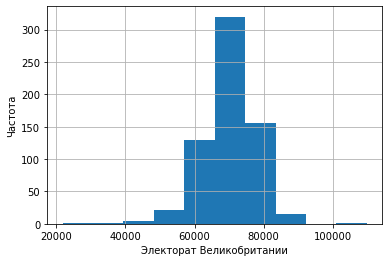

In [17]:
# Построить гистограмму частотных корзин 
#       электората Великобритании

df['Electorate'].hist()
plt.xlabel('Электорат Великобритании')
plt.ylabel('Частота')
#saveplot('ex_1_12.png')  
plt.show()

Число корзин, на которые данные разбиваются, можно сконфигурировать, передав в функцию при построении гистограммы именованный аргумент bins. Приведенный выше график показывает единственный высокий пик, однако он выражает форму данных довольно грубо. Следующий ниже график показывает мелкие детали, но величина столбцов делает неясной форму распределения, в особенности в хвостах:

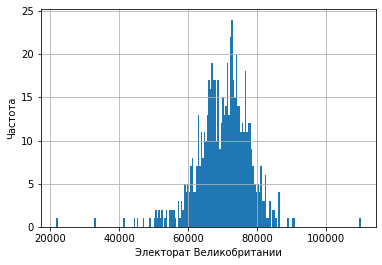

In [18]:
df['Electorate'].hist(bins=200)
plt.xlabel('Электорат Великобритании')
plt.ylabel('Частота')
#saveplot('ex_1_12.png')  
plt.show()

При выборе количества корзин для представления данных следует найти точку равновесия — с малым количеством корзин форма данных будет представлена лишь приблизительно, а слишком большое их число приведет к тому, что шумовые признаки могут заслонить лежащую в основании структуру.Окончательный график, состоящий из 20 корзин, судя по всему, пока лучше всего представляет эти данные.

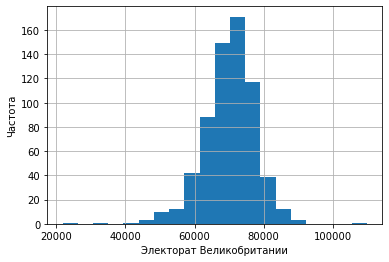

In [19]:
df['Electorate'].hist(bins=20)
plt.xlabel('Электорат Великобритании')
plt.ylabel('Частота')
#saveplot('ex_1_12.png')  
plt.show()

## Нормальное распределение

Гистограмма дает приблизительное представление о том, каким образом данные распределены по всему диапазону, и является визуальным средством, которое позволяет квалифицировать данные как относящиеся к одному из немногих популярных распределений. В анализе данных многие распределения встречаются часто, но ни одно не встречается также часто, как нормальное распределение, именуемое также гауссовым распределением.

### Центральная предельная теорема

Высокая встречаемость нормального распределения отчасти объясняется центральной предельной теоремой. Дело в том, что значения, полученные из разнообразных статистических распределений, при определенных обстоятельствах имеют тенденцию сходиться к нормальному распределению.

В программировании типичным распределением является равномерное распределение. Оно представлено распределением чисел, генерируемых функцией библиотеки scipy stats.uniform.rvs: в справедливом генераторе случайных чисел все числа имеют равные шансы быть сгенерированными. Мы можем увидеть это на гистограмме, многократно генерируя серию случайных чисел между 0 и 1 и затем построив график с результатами.

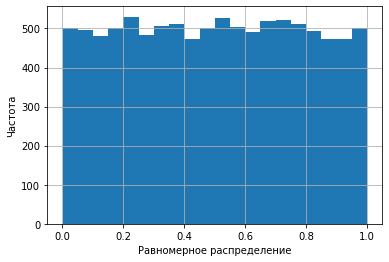

In [20]:
# Показать гистограмму равномерного распределения 
#       синтетического набора данных
# как вариант, xs = [random.uniform(0, 1) for _ in range(10000)]

xs = stats.uniform.rvs(0, 1, 10000)
pd.Series(xs).hist(bins=20)
plt.xlabel('Равномерное распределение')
plt.ylabel('Частота')            
plt.show()

Каждый столбец гистограммы имеет примерно одинаковую высоту, что соответствует равновероятности генерирования числа, которое попадает в каждую корзину. Столбцы имеют не совсем одинаковую высоту, потому что равномерное распределение описывает теоретический результат, который наша случайная выборка не может отразить в точности. Раздел инференциальной статистики, посвященный проверке статистических гипотез, изучает способы точной количественной оценки расхождения между теорией и практикой, чтобы определить, являются ли расхождения достаточно большими, чтобы обратить на это внимание. В данном случае они таковыми не являются.

Если напротив сгенерировать гистограмму средних значений последовательностей чисел, то в результате получится распределение, которое выглядит совсем непохоже.

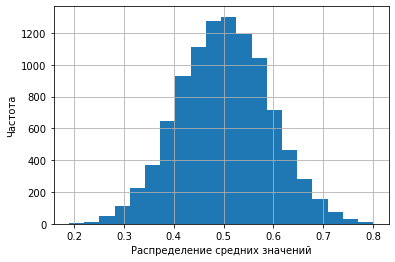

In [21]:
def bootstrap(xs, n, replace=True): 
    '''Вернуть список массивов меньших размеров 
       по n элементов каждый'''
    return np.random.choice(xs, (len(xs), n), replace=replace) 

def ex_1_16():
    '''Построить гистограмму средних значений'''
    xs = stats.uniform.rvs(loc=0, scale=1, size=10000)
    pd.Series( map(sp.mean, bootstrap(xs, 10)) ).hist(bins=20)
    plt.xlabel('Распределение средних значений') 
    plt.ylabel('Частота')
    plt.show()
ex_1_16()

Хотя величина среднего значения близкая к 0 или 1 не является невозможной, она является чрезвычайно невероятной и становится менее вероятной по мере роста числа усредненных чисел и числа выборочных средних. Фактически, на выходе получается результат очень близкий к нормальному распределению.

Этот результат, когда средний эффект множества мелких случайных колебаний в итоге приводит к нормальному распределению, называется центральной предельной теоремой, иногда сокращенно ЦПТ, и играет важную роль для объяснения, почему нормальное распределение встречается так часто в природных явлениях.

## Булочник и Пуанкаре

<blockquote>
Существует легенда, почти наверняка апокрифическая, которая дает возможность детальнее рассмотреть вопрос о том, каким образом центральная предельная теорема позволяет рассуждать о принципе формирования статистических распределений. Она касается прославленного французского эрудита XIX-ого века Анри Пуанкаре, который, как гласит легенда, в течение одного года каждый день занимался тем, что взвешивал свежую буханку хлеба.

В те времена хлебопекарное ремесло регламентировалось государством, и Пуанкаре обнаружил, что, хотя результаты взвешивания буханок хлеба подчинялись нормальному распределению, пик находился не на публично афишируемом 1 кг, а на 950 г. Он сообщил властям о булочнике, у которого он регулярно покупал хлеб, и тот был оштрафован. Такова легенда ;-).

В следующем году Пуанкаре продолжил взвешивать буханки хлеба того же булочника. Он обнаружил, что среднее значение теперь было равно 1 кг, но это распределение больше не было симметричным вокруг среднего значения. Теперь оно было смещено вправо. А это соответствовало тому, что булочник теперь давал Пуанкаре только самые тяжелые из своих буханок хлеба. Пуанкаре снова сообщил о булочнике властям, и булочник был оштрафован во второй раз.

Было ли это на самом деле или нет здесь не суть важно; этот пример всего лишь служит для того, чтобы проиллюстрировать ключевой момент — статистическое распределение последовательности чисел может сообщить нам нечто важное о процессе, который ее создал.
</blockquote>

### Генерирование распределений

В целях развития нашего интуитивного понимания относительно нормального распределения и дисперсии, давайте смоделируем честного и нечестного булочников, и для этого воспользуемся функцией генерирования нормально распределенных случайных величин stats.norm.rvs. (rvs от англ. normal variates, т.е. нормально-распределенные случайные величины). Честного булочника можно смоделировать в виде нормального распределения со средним значением 1000, что соответствует справедливой буханке хлеба весом 1 кг. При этом мы допустим наличие дисперсии в процессе выпекания, которая приводит к стандартному отклонению в 30г.

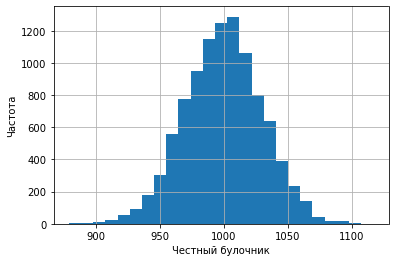

In [53]:
pd.Series( stats.norm.rvs(1000, 30, size=10000) ).hist(bins=25)
plt.xlabel('Честный булочник') 
plt.ylabel('Частота')             
plt.show()

Теперь смоделируем булочника, который продает только самые тяжелые буханки хлеба. Мы разобьем последовательность на группы по тринадцать элементов (на «чертовы дюжины») и отберем максимальное значение в каждой:

In [56]:
def dishonest_baker( loc, scale ):
    '''Модель нечестного булочника'''
    xs = stats.norm.rvs(loc, scale, size=10000) 
    return pd.Series( map(max, bootstrap(xs, 13)) )  # взять макс. в каждой подгруппе   

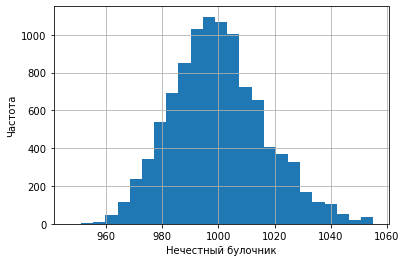

In [58]:
def ex_1_19():
    '''Смоделировать нечестного булочника на гистограмме'''
    dishonest_baker(950, 30).hist(bins=25)
    plt.xlabel('Нечестный булочник') 
    plt.ylabel('Частота')               
    plt.show()

ex_1_19()